## Final Project Submission

* Student name: Connor Anastasio
* Student pace: self paced (part time)
* Scheduled project review date/time: TBD
* Instructor name: Morgan Jones
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Aircraft Analysis: Low-risk Aviation Investments

## Overview

This project analyzes the risk, profitability, and opportunity cost of investing in Aviation aircrafts. We will use  of the [Aviation Accident Data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) to create a detailed and informative write-up of which Aircraft are the least likely to be involved in accident. Of those, we will then look at which are the least likely to have fatalies (or alternatively, lowest fatalities).

Descriptive analysis of flight and aircraft data shows that certain types of aircraft are significantly less likely to result in losses than others. We will outline three separate investment strategies and explain the benefit of each.

## Business Problem

![img](./images/animals.png)

The Austin Animal Shelter may be able to improve their resource allocation to both reduce costs and ensure that the center has staff and space to care for the animals brought to them. Doing so will allow the Austin Animal Shelter to better serve its clients while also freeing up resources to expand the scope of services they can offer. Using AAC's animal intake and outcome data, I describe patterns in intakes, stays, and exits to anticipate AAC's outreach, space, and staffing needs for supporting sheltered animals.

In [2]:
#not sure what I'll need so I'll just import everything 
import pandas as pd
import numpy as np
#import seaborn as sns


We will be using the [Aviation Accident Data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) dataset from Kaggle. It contains very detailed information on aircraft crashes, part failures, and fatalities.

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')

/var/folders/y4/136jbn9s52df1krsdx_9ncrm0000gn/T/ipykernel_4393/3151680963.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_Data.csv')


In [4]:
columns_to_object = [6, 7, 28]
df = pd.read_csv('data/Aviation_Data.csv', dtype={col: 'object' for col in columns_to_object})
#df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

We will need to examine columns 6,7 and 28 to determine what format they should be in. It seems there is quite a bit of cleaning to do before we can perform some analysis on this dataset.

In [6]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
seven_col = df.iloc[:, 6] 
eight_col = df.iloc[:, 7]
twonine_col = df.iloc[:, 28]

In [8]:
seven_col.describe()

count       34382
unique      25589
top       332739N
freq           19
Name: latitude, dtype: object

In [9]:
seven_col.value_counts()

latitude
332739N      19
335219N      18
334118N      17
32.815556    17
324934N      16
             ..
039613N       1
342034N       1
433113N       1
343255N       1
373829N       1
Name: count, Length: 25589, dtype: int64

In [10]:
eight_col.describe()

count        34373
unique       27154
top       0112457W
freq            24
Name: longitude, dtype: object

In [11]:
eight_col.value_counts()

longitude
0112457W       24
1114342W       18
1151140W       17
-104.673056    17
-112.0825      16
               ..
0843135W        1
0101957W        1
1064131W        1
1114414W        1
0121410W        1
Name: count, Length: 27154, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      90348 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50132 non-null  object 
 9   airport_name            52704 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87507 non-null  object 
 14  make                    88826 non-null

In [13]:
#I don't understand Longitude and Latitude and a lot is missing so let's drop
df.drop(columns = ['latitude', 'longitude'], inplace=True)

In [14]:
twonine_col.describe()

count       61724
unique         12
top       Landing
freq        15428
Name: broad_phase_of_flight, dtype: object

In [15]:
twonine_col.value_counts()

broad_phase_of_flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [16]:
twonine_col.isnull().sum()

28624

In [17]:
#drop this as well. It could be interesting to use for analysis, but Unk+other+NaN is twice the size of the biggest category
df.drop(columns = ['broad_phase_of_flight'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      90348 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   airport_code            50132 non-null  object 
 7   airport_name            52704 non-null  object 
 8   injury_severity         87889 non-null  object 
 9   aircraft_damage         85695 non-null  object 
 10  aircraft_category       32287 non-null  object 
 11  registration_number     87507 non-null  object 
 12  make                    88826 non-null  object 
 13  model                   88797 non-null  object 
 14  amateur_built           88787 non-null

In [18]:
df['investigation_type'].unique()

array(['Accident', 'Incident', '25-09-2020', '14-06-2021', '03-11-2020',
       '24-02-2021', '02-02-2021', '05-05-2021', '03-12-2020',
       '07-12-2020', '06-05-2021', '19-11-2020', '04-08-2021',
       '13-09-2021', '10-06-2021', '14-12-2021', '08-06-2021',
       '24-06-2021', '24-08-2021', '31-03-2021', '27-05-2021',
       '20-05-2021', '18-11-2020', '25-05-2021', '01-06-2021',
       '15-07-2021', '15-10-2021', '26-09-2020', '03-06-2021',
       '29-09-2021', '28-01-2021', '20-10-2021', '11-12-2020',
       '11-02-2021', '13-12-2021', '06-01-2021', '31-08-2021',
       '04-03-2021', '05-04-2021', '26-01-2021', '29-01-2021',
       '26-08-2021', '08-11-2021', '20-08-2021', '05-01-2021',
       '22-09-2021', '20-09-2021', '16-07-2021', '19-10-2021',
       '16-11-2021', '17-12-2021', '14-06-2022', '22-06-2022',
       '13-10-2022', '03-11-2022', '13-07-2022', '05-07-2022',
       '01-09-2022', '12-08-2022', '08-09-2022', '22-09-2022',
       '01-11-2022', '01-07-2022', '20-07-202

In [19]:
df = df[df['investigation_type'] == 'Accident']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85015 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                85015 non-null  object 
 1   investigation_type      85015 non-null  object 
 2   accident_number         85015 non-null  object 
 3   event_date              85015 non-null  object 
 4   location                84975 non-null  object 
 5   country                 84809 non-null  object 
 6   airport_code            48177 non-null  object 
 7   airport_name            50675 non-null  object 
 8   injury_severity         84688 non-null  object 
 9   aircraft_damage         83555 non-null  object 
 10  aircraft_category       30535 non-null  object 
 11  registration_number     83908 non-null  object 
 12  make                    84979 non-null  object 
 13  model                   84955 non-null  object 
 14  amateur_built           84957 non-null  obj

In [20]:
df['amateur_built'].unique()


array(['No', 'Yes', nan], dtype=object)

Investing in a non-professionally made aircraft is likely a poor financial decision. We should only consider accident data for professionally made aircraft. We will have to also drop the rows where it is unknown as we cannot confirm it was not amateur built:

In [21]:
df = df[df['amateur_built'] == 'No']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76520 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                76520 non-null  object 
 1   investigation_type      76520 non-null  object 
 2   accident_number         76520 non-null  object 
 3   event_date              76520 non-null  object 
 4   location                76482 non-null  object 
 5   country                 76320 non-null  object 
 6   airport_code            43034 non-null  object 
 7   airport_name            45319 non-null  object 
 8   injury_severity         76194 non-null  object 
 9   aircraft_damage         75074 non-null  object 
 10  aircraft_category       27000 non-null  object 
 11  registration_number     75530 non-null  object 
 12  make                    76500 non-null  object 
 13  model                   76484 non-null  object 
 14  amateur_built           76520 non-null  obj

In [22]:
# Drop Event ID - irrelevant
#drop investigation type - redundant now since we have removed every non-accident from our df
#Drop Accident number - irrelevant
#Drop Airport code - irrelevant
#Drop Airport name - irrelevant
#drop aircraft category - too many null values
#Drop registraton_number - irrelevant
#drop amateur built- redundant now since we have removed every non-accident from our df
#FAR.Description - irrelevant/too many null
#drop schedule - too many null
#drop purpose of flight - irrelevant
#drop air carrier - irrelevant
#drop publication date - irrelevant
df.drop(columns = ['event_id', 'investigation_type', 'accident_number', 'airport_code', 'airport_name', 'aircraft_category','registration_number', 
                   'amateur_built', 'far_description', 'schedule', 'purpose_of_flight', 'air_carrier', 'publication_date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76520 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              76520 non-null  object 
 1   location                76482 non-null  object 
 2   country                 76320 non-null  object 
 3   injury_severity         76194 non-null  object 
 4   aircraft_damage         75074 non-null  object 
 5   make                    76500 non-null  object 
 6   model                   76484 non-null  object 
 7   number_of_engines       71948 non-null  float64
 8   engine_type             71033 non-null  object 
 9   total_fatal_injuries    66952 non-null  float64
 10  total_serious_injuries  66027 non-null  float64
 11  total_minor_injuries    66532 non-null  float64
 12  total_uninjured         71746 non-null  float64
 13  weather_condition       73487 non-null  object 
 14  report_status           71626 non-null  obj

In [23]:
df['total_injuries'] = df['total_fatal_injuries'] + df['total_serious_injuries'] + df['total_minor_injuries']
df

,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,total_injuries
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Probable Cause,2.0
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Probable Cause,4.0
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,NaN
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,2.0
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,1.0
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN,0.0
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [24]:
df['total_injuries'].value_counts()

total_injuries
0.0      35002
1.0      14111
2.0       9106
3.0       2638
4.0       1887
         ...  
59.0         1
97.0         1
52.0         1
229.0        1
99.0         1
Name: count, Length: 116, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76520 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              76520 non-null  object 
 1   location                76482 non-null  object 
 2   country                 76320 non-null  object 
 3   injury_severity         76194 non-null  object 
 4   aircraft_damage         75074 non-null  object 
 5   make                    76500 non-null  object 
 6   model                   76484 non-null  object 
 7   number_of_engines       71948 non-null  float64
 8   engine_type             71033 non-null  object 
 9   total_fatal_injuries    66952 non-null  float64
 10  total_serious_injuries  66027 non-null  float64
 11  total_minor_injuries    66532 non-null  float64
 12  total_uninjured         71746 non-null  float64
 13  weather_condition       73487 non-null  object 
 14  report_status           71626 non-null  obj

In [26]:
df['total_non_fatal_injuries'] = df['total_serious_injuries'] + df['total_minor_injuries']

In [27]:
df

,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status,total_injuries,total_non_fatal_injuries
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Probable Cause,2.0,0.0
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Probable Cause,4.0,0.0
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,NaN,NaN
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,2.0,0.0
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN,0.0,0.0
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


Let's clean the rest of the data and check for issues. First we need to ensure the date column is properly formatted for all 76,520 rows. We can do this by writing a simple for loop to ensure all of the values can be converted to standard Pandas datetime. If this code does not return an error, we won't have to worry.

In [28]:
date_column = 'event_date'

def check_date_format(date):
    try:
        pd.to_datetime(date)
        return True
    except ValueError:
        return False

# Check if all dates in the column are properly formatted
all_dates_valid = df[date_column].map(check_date_format).all()

if all_dates_valid:
    print("All dates are properly formatted.")
else:
    print("Some dates have formatting issues.")

All dates are properly formatted.


In [29]:
df['make'] = df['make'].str.title()

In [30]:
df['make_model'] = df['make'] + '_' + df['model']

In [31]:
#df.fillna("UNK", inplace=True)
df['make'].replace('Air Tractor', 'Air Tractor Inc', inplace=True)
df['make'].value_counts()

make
Cessna                          26695
Piper                           14631
Beech                            5161
Bell                             2642
Boeing                           1342
                                ...  
Eclipse Aviation Corporation        1
Wsl Pzl                             1
Bolenbaugh Phillip William          1
Grimes Barry R                      1
Royse Ralph L                       1
Name: count, Length: 1879, dtype: int64

In [32]:
df['make'].describe()

count      76500
unique      1879
top       Cessna
freq       26695
Name: make, dtype: object

AS we can see, there are 1880 different Makes, and many appear only once. Let's create a histogram with the top 40 most frequently occurring makes in our dataset:

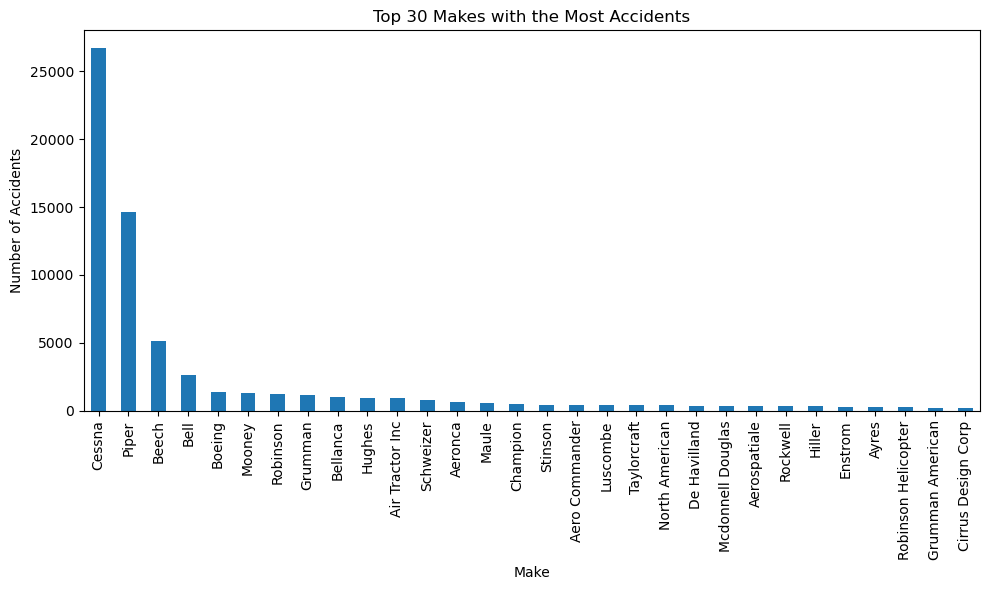

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#Create a variable to store the top 30 most frequently occurring makes:
top_30_makes = df['make'].value_counts().nlargest(30)

# Plotting the histogram for top 30 makes
plt.figure(figsize=(10, 6))
top_30_makes.plot(kind='bar')
plt.title('Top 30 Makes with the Most Accidents')
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
#analyze frequency
df['year'] = pd.to_datetime(df['event_date']).dt.year
    

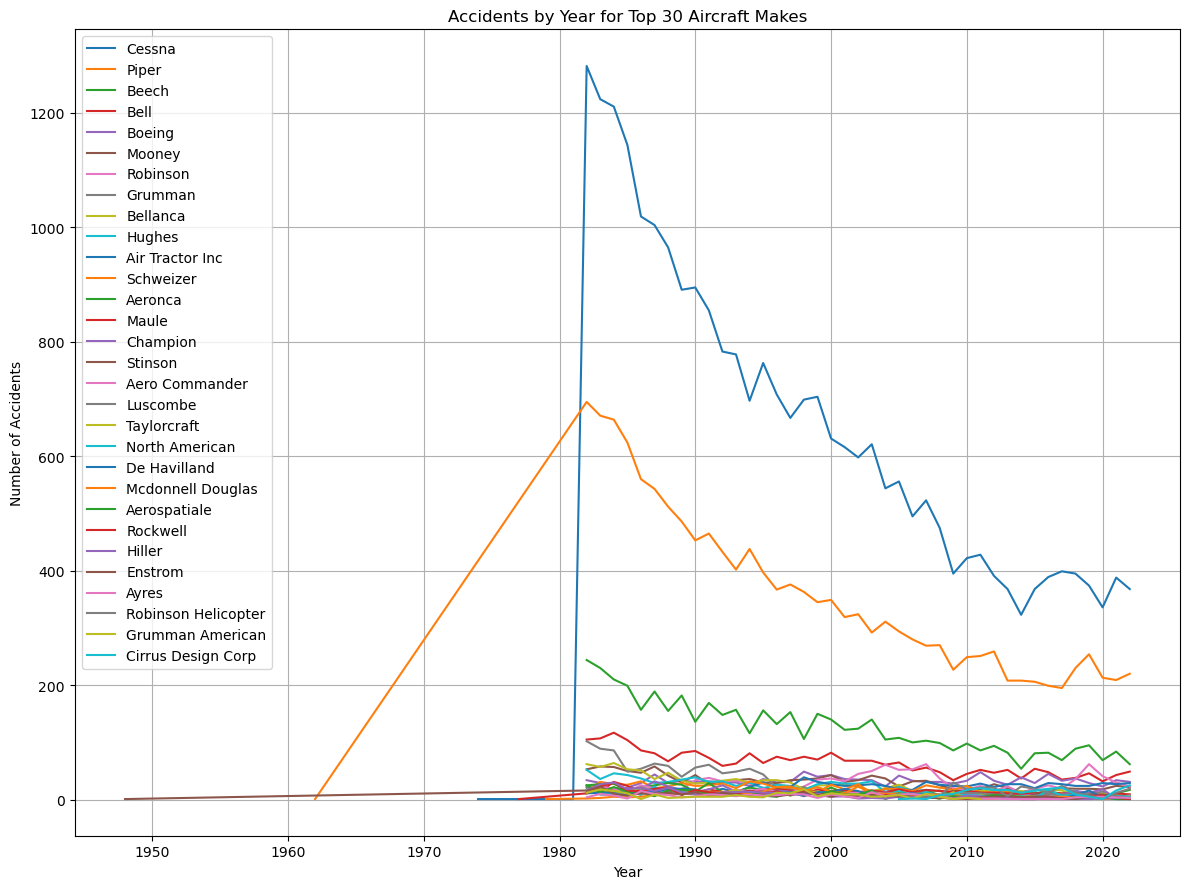

In [40]:
top_30_aircraft = df['make'].value_counts().nlargest(30).index.tolist()

# Filtering DataFrame for 30 most prevalent aircraft makes
df_top_30 = df[df['make'].isin(top_30_aircraft)]

# Grouping data by make and year, and counting occurrences
grouped = df_top_30.groupby(['make', 'year']).size().reset_index(name='accidents')

# Creating a line chart for each aircraft make
plt.figure(figsize=(12, 9))

for make in top_30_aircraft:
    make_data = grouped[grouped['make'] == make]
    plt.plot(make_data['year'], make_data['accidents'], label=make)

plt.title('Accidents by Year for Top 30 Aircraft Makes')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()